# Stock Market Analysis 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading dataset
df= pd.read_excel("stock market.xlsx")

In [3]:
# viewing data
df.head()

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Profit Margin,5Y Avg EBITDA Margin,...,Net Income,PBT,Earnings Per Share,EBITDA,Long Term Investments,Reserves & Surplus,Cash and Equivalent,Book Value,Free Cash Flow,Operating Cash Flow
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Refining & Marketing,1.679534e+06,2467.40,34.186904,7.793277,3.957021,9.725370,17.720494,...,49128.00,55461.00,74.653049,103222.00,212382.00,579376.00,169843.00,799432.00,-79652.00,26185.00
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1.358569e+06,3626.70,41.892356,37.740680,25.932382,19.383065,29.072528,...,32430.00,43760.00,87.043624,48462.00,213.00,86063.00,38489.00,87108.00,35727.00,38802.00
2,HDFC Bank Ltd,HDFCBANK,Private Banks,8.206363e+05,1486.50,25.779258,16.435200,1.883433,20.420916,28.206116,...,31833.20,42796.14,57.899268,44181.15,438823.11,148746.23,121272.52,210442.95,40780.31,42476.46
3,Infosys Ltd,INFY,IT Services & Consulting,7.775010e+05,1853.05,40.178853,27.135305,19.417895,18.847214,28.656802,...,19351.00,26628.00,45.607423,30090.00,11863.00,73627.00,27056.00,76782.00,21117.00,23224.00
4,ICICI Bank Ltd,ICICIBANK,Private Banks,5.002790e+05,710.75,27.212283,12.382897,1.243333,11.395012,11.900543,...,18384.31,26028.33,27.461218,27368.40,536578.62,107231.52,147570.54,167175.84,136327.09,138015.30


In [4]:
df.shape

(2000, 44)

In [5]:
# identifying  data type and columns with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            2000 non-null   object 
 1   Ticker                          2000 non-null   object 
 2   Sub-Sector                      1947 non-null   object 
 3   Market Cap                      2000 non-null   float64
 4   Close Price                     2000 non-null   float64
 5   PE Ratio                        1957 non-null   float64
 6   Return on Equity                1870 non-null   float64
 7   Return on Assets                1952 non-null   float64
 8   Net Profit Margin               1953 non-null   float64
 9   5Y Avg EBITDA Margin            1880 non-null   float64
 10  EBITDA Margin                   1953 non-null   float64
 11  1Y Return vs Nifty              2000 non-null   float64
 12  5Y CAGR                         15

In [6]:
#identfying missing value % for each column
(df.isnull().sum()/df.shape[0])*100

Name                               0.00
Ticker                             0.00
Sub-Sector                         2.65
Market Cap                         0.00
Close Price                        0.00
PE Ratio                           2.15
Return on Equity                   6.50
Return on Assets                   2.40
Net Profit Margin                  2.35
5Y Avg EBITDA Margin               6.00
EBITDA Margin                      2.35
1Y Return vs Nifty                 0.00
5Y CAGR                           20.35
Debt to Equity                     8.25
Long Term Debt to Equity           8.35
Net Income / Liabilities          22.15
5Y Historical Revenue Growth       6.45
5Y Historical EBITDA Growth       18.80
5Y Hist Op. Cash Flow Growth      36.35
5Y Historical EPS Growth          33.55
Forward PE Ratio                  73.45
Enterprise Value                   0.05
PB Ratio                           2.30
Dividend Yield                    45.10
PE Premium vs Sector               2.15


In [7]:
df.columns

Index(['Name', 'Ticker', 'Sub-Sector', 'Market Cap', 'Close Price', 'PE Ratio',
       'Return on Equity', 'Return on Assets', 'Net Profit Margin',
       '5Y Avg EBITDA Margin', 'EBITDA Margin', '1Y Return vs Nifty',
       '5Y CAGR', 'Debt to Equity', 'Long Term Debt to Equity',
       'Net Income / Liabilities', '5Y Historical Revenue Growth',
       '5Y Historical EBITDA Growth', '5Y Hist Op. Cash Flow Growth',
       '5Y Historical EPS Growth', 'Forward PE Ratio', 'Enterprise Value',
       'PB Ratio', 'Dividend Yield', 'PE Premium vs Sector',
       'Domestic Institutional Holding', 'Mutual Fund Holding',
       'Promoter Holding', 'Foreign Institutional Holding',
       'Retail Investor Holding', 'Pledged Promoter Holdings',
       'Insurance Firms Holding', 'No. of Shareholders', 'Total Revenue',
       'Net Income', 'PBT', 'Earnings Per Share', 'EBITDA',
       'Long Term Investments', 'Reserves & Surplus', 'Cash and Equivalent',
       'Book Value', 'Free Cash Flow', 'Operati

In [9]:
# Task1-screen the companies and visualise them according to sub-sectors using a bar charts.

In [10]:
#grouping subsector to get its count
sub_sector=df.groupby("Sub-Sector")["Name"].count().reset_index().sort_values(by="Name" ,ascending=False)
sub_sector.rename(columns={"Name" :"No_of_companies"} ,inplace=True)

In [11]:
# Count no of companies in each sector in descending order
sub_sector

,Sub-Sector,No_of_companies
88,Pharmaceuticals,104
125,Textiles,86
11,Auto Parts,84
59,Industrial Machinery,76
24,Commodity Chemicals,73
...,...,...
8,Animation,1
18,Building Products - Prefab Structures,1
112,Soft Drinks,1
107,Retail - Online,1


In [16]:
# Percent composition of  sector in market
a=sub_sector["No_of_companies"].sum()

In [19]:
# Cumilative Percent Share of companies in Market in ascending order
sub_sector["Cum_Percentage_of_Market"]=sub_sector["Percentage_of_Market"].cumsum()

In [18]:
sub_sector

,Sub-Sector,No_of_companies,Percentage_of_Market,Cum_Percentage_of_Market
88,Pharmaceuticals,104,5.341551,5.341551
125,Textiles,86,4.417052,9.758603
11,Auto Parts,84,4.314330,14.072933
59,Industrial Machinery,76,3.903441,17.976374
24,Commodity Chemicals,73,3.749358,21.725732
...,...,...,...,...
8,Animation,1,0.051361,99.794556
18,Building Products - Prefab Structures,1,0.051361,99.845917
112,Soft Drinks,1,0.051361,99.897278
107,Retail - Online,1,0.051361,99.948639


<AxesSubplot:xlabel='Sub-Sector', ylabel='Cum_Percentage_of_Market'>

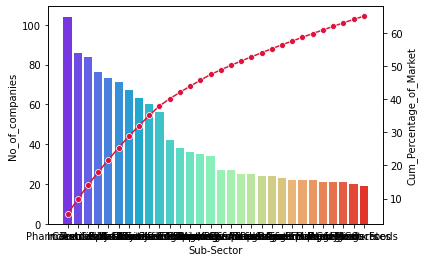

In [15]:
#visualising data 
ax=sns.barplot(x="Sub-Sector" ,y="No_of_companies" , data=sub_sector[:30] ,palette="rainbow")
ax2=ax.twinx()
sns.lineplot(x="Sub-Sector" ,y="Cum_Percentage_of_Market" , data=sub_sector[:30] , marker="o",ax=ax2, color="crimson")

In [20]:
# Task2-visualise the companies by segregating them according to Market Cap in three categories

In [21]:
# segregating them according to Market Cap in three categories
df["Cap_Size"]=np.where(df['Market Cap'] <5000,'Small Cap',
               np.where(df['Market Cap'] <20000,'Mid Cap','Large Cap'))

In [22]:
df[['Name','Ticker','Sub-Sector','Market Cap','5Y Historical EPS Growth','Dividend Yield',"Cap_Size"]]

,Name,Ticker,Sub-Sector,Market Cap,5Y Historical EPS Growth,Dividend Yield,Cap_Size
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Refining & Marketing,1.679534e+06,8.340978,0.281831,Large Cap
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1.358569e+06,7.100835,1.034647,Large Cap
2,HDFC Bank Ltd,HDFCBANK,Private Banks,8.206363e+05,17.890164,0.436650,Large Cap
3,Infosys Ltd,INFY,IT Services & Consulting,7.775010e+05,9.098144,1.474197,Large Cap
4,ICICI Bank Ltd,ICICIBANK,Private Banks,5.002790e+05,11.494489,0.276496,Large Cap
...,...,...,...,...,...,...,...
1995,Galaxy Bearings Ltd,GALXBRG,Heavy Machinery,1.256577e+02,37.315428,NaN,Small Cap
1996,Signet Industries Ltd,SIGIND,Plastic Products,1.255488e+02,-4.497604,1.172333,Small Cap
1997,Suraj Ltd,SURAJLTD,Iron & Steel,1.255056e+02,29.928304,NaN,Small Cap
1998,Polson Ltd,POLSON,Commodity Chemicals,1.253262e+02,-11.985282,NaN,Small Cap


In [23]:
#grouping data on basis of Cap Size
market_cap_size=df.groupby("Cap_Size")["Name"].count().reset_index().sort_values(by="Name" ,ascending=False)
market_cap_size.rename(columns={"Name" :"No_of_companies"} ,inplace=True)

In [24]:
market_cap_size

,Cap_Size,No_of_companies
2,Small Cap,1494
1,Mid Cap,281
0,Large Cap,225


<AxesSubplot:xlabel='No_of_companies', ylabel='Cap_Size'>

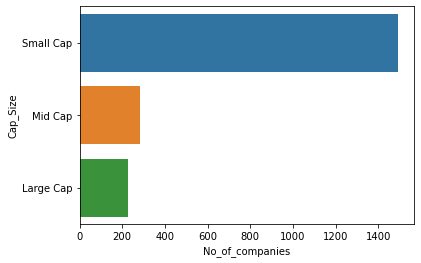

In [25]:
#visuasing data
sns.barplot(x="No_of_companies" ,y="Cap_Size" ,data=market_cap_size)

In [26]:
df["Dividend Yield"].isnull().sum()
# we have 902 missing values which have to bre taken cate of for calculating intrinsic value

902

In [27]:
# filling missing values of dividend as it will  depns on caps  size ,
# we have filled *missing values* on basis of that below
# 1. max upper limit  of known dividend for 'small cap' and 'mid cap' of 
# 2. mean value of known dividend for 'large cap'


In [28]:
# filled *missing values* 
df["Dividend Yield"].fillna(
    pd.Series(np.where(df["Cap_Size"]== 'Small Cap',5000,
    np.where(df["Cap_Size"]=='Mid Cap', 20000 ,df[df["Cap_Size"]=="Large Cap"].mean()[0]))),inplace=True)

C:\Users\Honasa\AppData\Local\Temp/ipykernel_17196/3371908697.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  np.where(df["Cap_Size"]=='Mid Cap', 20000 ,df[df["Cap_Size"]=="Large Cap"].mean()[0]))),inplace=True)


In [29]:
df["Dividend Yield"].isnull().sum()
# no null values now

0